

<ol>
    <li><b>movie_story_student_file.csv</b>: This file contains the movie stories that should be used by students for model development.</li>
    <li><b>movie_story_evaluation_file.csv</b>: This file should NOT be used for model development purposes. Students should only use this file after developing their predictive models and selecting their best final model. They then need to use their best predictive model and predict whether or not the movies in <b>movie story evaluation file.csv</b> are Drama.</li>
    <li><b>movies.csv</b>: This file contain the movie genres.</li>
</ol>

### Output

In [1]:
import pandas as pd
import numpy as np

## Step 1 - Data Cleaning and Preprocessing

In [2]:
#Import the files given 
m_stu=pd.read_csv("movie_story_student_file.csv")
m_eval=pd.read_csv("movie_story_evaluation_file.csv")
movies=pd.read_csv("movies.csv")

In [3]:
m_stu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  20000 non-null  int64 
 1   story     20000 non-null  object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [4]:
movies2=pd.merge(m_stu,movies,left_on='movie_id',right_on='movieId',how='inner').drop(['movieId','title'],axis=1)
print(movies2) 
movies2.shape

       movie_id                                              story  \
0        131072  A girl who always tends to fall in love with t...   
1        196609  Bigfoot has come to the town of Ellwood City, ...   
2        131074  At an altitude of 18,000 feet, Alaska\'s Mount...   
3        196611  In her first special since 2003, Ellen revisit...   
4        196613  Mike and Sulley are back at Monsters Universit...   
...         ...                                                ...   
19995     56801  The iconic creatures from two of the scariest ...   
19996    122337  When a bored-with-life English teacher meets a...   
19997    187875  Herbert Blount is a crowdfunding contributor f...   
19998    187873  REAL BOY is the coming-of-age story of Bennett...   
19999     56805  Following a childhood tragedy, Dewey Cox follo...   

                                  genres  
0                                 Comedy  
1                          Comedy|Horror  
2                            D

(20000, 3)

In [5]:
#drop rows with no genres listed
movies2 = movies2[movies2.genres != "(no genres listed)"]
movies2 = movies2.dropna()
movies2.head(50)

movies2 = movies2[movies2.genres != "(no genres listed)"]
movies2 = movies2.dropna()
movies2.head()

,movie_id,story,genres
0,131072,A girl who always tends to fall in love with t...,Comedy
1,196609,"Bigfoot has come to the town of Ellwood City, ...",Comedy|Horror
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",Documentary
3,196611,"In her first special since 2003, Ellen revisit...",Comedy
4,196613,Mike and Sulley are back at Monsters Universit...,Animation|Children|Comedy|Fantasy


In [6]:
movies2.shape

(18886, 3)

In [7]:
#Use regex to clean the story column 
import re
clean=[]
for char in movies2['story']:
    char = char.lower()  #Convert to lowercase
    char.rstrip()
    char.lstrip()
    char = re.sub(' s ',' ',char)  #remove extra characters 
    char = re.sub(' +', ' ',char) #remove extra space
    char = re.sub(r'[^\w] ',' ',char)  #remove symbols
    char = re.sub(r'[^\w\s]',' ',char) #remove symbols
    char = re.sub(r'\\x..',' ',char) #remove HTML tags
    char = re.sub("[^a-zA-Z]"," ",char) 
    clean.append(char)
movies2['story']=clean

In [8]:
movies2["genres"].value_counts()


Drama                                        3044
Documentary                                  2358
Comedy                                       1690
Comedy|Drama                                  892
Drama|Romance                                 607
                                             ... 
Romance|War                                     1
Action|Animation|Mystery|IMAX                   1
Action|Adventure|Children|Comedy|Fantasy        1
Children|Comedy|Crime|Mystery                   1
Action|Adventure|Crime|Drama|Thriller|War       1
Name: genres, Length: 979, dtype: int64

In [9]:
#Convert movies with "Drama" genre to binary format
#Add a new column - Drama Genre to identify movies with Drama genre
movies2["DramaGenre"] = np.where(movies2["genres"].str.contains("Drama"), 1, 0)

## Step 2 - Create main_dataset

In [10]:
#Create main_dataset
main_dataset_test = movies2
main_dataset_test.head(50)

,movie_id,story,genres,DramaGenre
0,131072,a girl who always tends to fall in love with t...,Comedy,0
1,196609,bigfoot has come to the town of ellwood city p...,Comedy|Horror,0
2,131074,at an altitude of feet alaska s mount ...,Documentary,0
3,196611,in her first special since ellen revisits...,Comedy,0
4,196613,mike and sulley are back at monsters universit...,Animation|Children|Comedy|Fantasy,0
5,131080,when lady tremaine steals the fairy godmother ...,Animation|Children|Fantasy|Musical|Romance,0
6,131084,film that mixes live action and animation from...,Adventure|Comedy|Fantasy,0
7,196621,when a beautiful ballerina dancer adriana mena...,Horror,0
8,131090,jonas is years old and has had to repeat se...,Comedy,0
9,196629,when ex soldier turned mercenary john gold lea...,Action,0


In [11]:
#Drop the genres column 
main_dataset = main_dataset_test.drop('genres', axis=1)

In [12]:
main_dataset

,movie_id,story,DramaGenre
0,131072,a girl who always tends to fall in love with t...,0
1,196609,bigfoot has come to the town of ellwood city p...,0
2,131074,at an altitude of feet alaska s mount ...,0
3,196611,in her first special since ellen revisits...,0
4,196613,mike and sulley are back at monsters universit...,0
...,...,...,...
19995,56801,the iconic creatures from two of the scariest ...,0
19996,122337,when a bored with life english teacher meets a...,1
19997,187875,herbert blount is a crowdfunding contributor f...,0
19998,187873,real boy is the coming of age story of bennett...,0


In [13]:
main_dataset.shape

(18886, 3)

In [14]:
#Save data to csv
main_dataset.to_csv('main_dataset.csv', index=False)

# Text Analysis

Install packages

In [15]:
!pip install wordcloud
!pip install nltk

#nltk.download() # Loads another window, best to download all packages
import sys
#!conda install --yes --prefix "{sys.prefix}" spacy 
#!python -m spacy download en_core_web_sm

In [15]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranatichauhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
!conda install --yes --prefix "{sys.prefix}" spacy 


Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer 
import spacy
#load spacy's English-language models
en_nlp = spacy.load('en_core_web_sm')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
main_dataset = pd.read_csv("main_dataset.csv")

There are 5958567 words in the combination of all review.


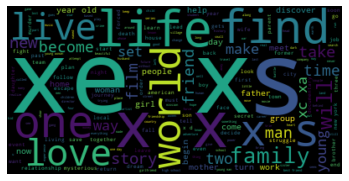

In [20]:
# word cloud of entire dataset without any tokenization
word = main_dataset.story
vect = CountVectorizer()
vect.fit(word)
bag_of_words = vect.transform(word)

words = " ".join(story for story in main_dataset.story)
print ("There are {} words in the combination of all review.".format(len(words)))
# remove stop words
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords)
wordcloud.generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

# Text and Feature Reduction
# Will use logicistic regression as a Baseline to see if what is better:
Bag of words, N-Grams, TF-IDF, Lemmatization, or a combo of steps

In [21]:
text, y = main_dataset.story, main_dataset.DramaGenre

set(y)

{0, 1}

# Unigram Bag of words

In [22]:
# we already created a bag of words a couple of lines above we will just reassign the variable
X = bag_of_words
X.shape

(18886, 44751)

In [23]:
# baseline logicistal regression 67.97%
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = LogisticRegression(max_iter=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat) * 100,2)

67.98

# Using N-Grams

In [24]:

vect = CountVectorizer(ngram_range=(1,2), stop_words="english").fit(text) 
X = vect.transform(text)
print("The number of features are: {}".format(len(vect.get_feature_names_out())))

model = LogisticRegression(max_iter=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat) * 100,2)
# about a 1.5% increase

The number of features are: 466810


70.01

In [25]:
vect = CountVectorizer(ngram_range=(1,3), stop_words="english").fit(text) 
X = vect.transform(text)
print("The number of features are: {}".format(len(vect.get_feature_names_out())))

model = LogisticRegression(max_iter=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat) * 100,2)
# about a half of percent increase to bigrams

The number of features are: 963827


70.14

In [26]:
vect = CountVectorizer(ngram_range=(1,4), stop_words="english").fit(text) 
X = vect.transform(text)
print("The number of features are: {}".format(len(vect.get_feature_names_out())))

model = LogisticRegression(max_iter=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat) * 100,2)
# same as triplets

The number of features are: 1450945


70.37

In [27]:
vect = CountVectorizer(ngram_range=(1,5), stop_words="english").fit(text) 
X = vect.transform(text)
print("The number of features are: {}".format(len(vect.get_feature_names_out())))

model = LogisticRegression(max_iter=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat) * 100,2)
# marginal decrease

The number of features are: 1920340


70.19

Higher ngram the higher amount of features, we probably will only run triplets 

# TF–IDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words="english").fit(text) 
X = vect.fit_transform(text)
print("The number of features are: {}".format(len(vect.get_feature_names_out())))

model = LogisticRegression(max_iter=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat) * 100,2)
# much lower features and with a better accuracy score, best so far

The number of features are: 44451


70.42

In [29]:
# to be thorough lets add triplet n-grams but this seem counterintuitive since we are added features back
text, y = main_dataset.story, main_dataset.DramaGenre

set(y)

vect = TfidfVectorizer(ngram_range=(1,3), stop_words="english").fit(text) 
X = vect.fit_transform(text)
print("The number of features are: {}".format(len(vect.get_feature_names_out())))

model = LogisticRegression(max_iter=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat) * 100,2)
# Large increase in features and a lower score

The number of features are: 963827


68.2

# Tokenization

In [30]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)
main_dataset['story'] = main_dataset['story'].apply(lemmatize_words)

text, y = main_dataset.story, main_dataset.DramaGenre

set(y)

{0, 1}

In [31]:

vect = CountVectorizer(stop_words="english").fit(text) 
X = vect.fit_transform(text)
print("The number of features are: {}".format(len(vect.get_feature_names_out())))

model = LogisticRegression(max_iter=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat) * 100,2)
# lower features than TF-IDF but accuracy is a lower lets try triplet n-grams next

The number of features are: 38158


67.45

In [32]:

vect = CountVectorizer(ngram_range=(1,3),stop_words="english").fit(text) 
X = vect.fit_transform(text)
print("The number of features are: {}".format(len(vect.get_feature_names_out())))

model = LogisticRegression(max_iter=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat) * 100,2)
# we see an increase but TF-IDF is still better

The number of features are: 921032


69.96

In [33]:
vect = TfidfVectorizer(stop_words="english").fit(text) 
X = vect.fit_transform(text)
print("The number of features are: {}".format(len(vect.get_feature_names_out())))

model = LogisticRegression(max_iter=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat) * 100,2)
# better but TF-IDF is still better

The number of features are: 38158


70.03

# Best analysis of X is to use TF-IDF stand alone

In [34]:
text, y = main_dataset.story, main_dataset.DramaGenre

set(y)

{0, 1}

In [35]:
vect = TfidfVectorizer(stop_words="english").fit(text) 
X = vect.fit_transform(text)
print("The number of features are: {}".format(len(vect.get_feature_names_out())))
# In theory we should be able to use this X to split every other model off of

The number of features are: 38158


# Logistic Regression

In [36]:
y = main_dataset['DramaGenre']

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [38]:
model_LG = LogisticRegression(max_iter=2500, class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
model_LG.fit(X_train, y_train)
y_test_hat_LG = model_LG.predict(X_test)
acc_LG = accuracy_score(y_test, y_test_hat_LG)

print("Logistic Regression Accuracy - Training Set: ", acc_LG.round(2))
print('----------------------------------')
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_test_hat_LG))

Logistic Regression Accuracy - Training Set:  0.69
----------------------------------
Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      2095
           1       0.65      0.67      0.66      1683

    accuracy                           0.69      3778
   macro avg       0.69      0.69      0.69      3778
weighted avg       0.69      0.69      0.69      3778



# Multinomial Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB

model_NB= MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
model_NB.fit(X_train, y_train)
y_test_hat_NB = model_NB.predict(X_test)
acc_NB = accuracy_score(y_test, y_test_hat_NB)

print("Multinomial Naive Bayes Accuracy - Training Set: ", acc_NB.round(2))
print('----------------------------------')
print("Classification Report - Multinomial Naive Bayes")
print(classification_report(y_test, y_test_hat_NB))


Multinomial Naive Bayes Accuracy - Training Set:  0.67
----------------------------------
Classification Report - Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       0.66      0.87      0.75      2095
           1       0.72      0.43      0.54      1683

    accuracy                           0.67      3778
   macro avg       0.69      0.65      0.64      3778
weighted avg       0.69      0.67      0.66      3778



# KNN Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score

accuracyRate = []
precisionRate = []
i = 1
while i <= 10:
  knnModel = KNeighborsClassifier(i)
  knnModel.fit(X_train, y_train)
  knnPredict = knnModel.predict(X_test)
  accuracyScore = accuracy_score(y_test, knnPredict)*100
  precisionScore = precision_score(y_test, knnPredict, average='macro') * 100
  accuracyRate.append(accuracyScore)
  precisionRate.append(precisionScore)
  i += 1

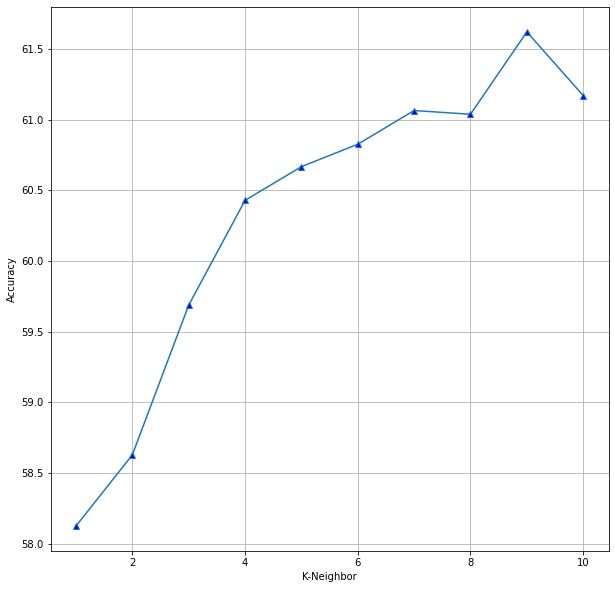

In [41]:
# accuracy score for different number nieghbors (up to 10 nieghbors)
plt.figure(figsize=(10,10))
plt.plot(range(1,11),accuracyRate,marker='^',markerfacecolor='blue',linestyle='solid')
plt.ylabel('Accuracy')
plt.xlabel('K-Neighbor')
plt.grid()
plt.show()

In [42]:
#As per graph above, 9 neighbors have highest accuracy
model_Knn = KNeighborsClassifier(9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model_Knn.fit(X_train,y_train)
y_test_hat_Knn = model_Knn.predict(X_test)
acc_Knn = accuracy_score(y_test, y_test_hat_Knn)

print("K-Neighbors Accuracy - Training Set: ", acc_Knn.round(2))
print('----------------------------------')
print("Classification Report - K-Neighbors")
print(classification_report(y_test, y_test_hat_Knn))

#So far logistic has highest accuracy

K-Neighbors Accuracy - Training Set:  0.63
----------------------------------
Classification Report - K-Neighbors
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      2120
           1       0.58      0.54      0.56      1658

    accuracy                           0.63      3778
   macro avg       0.62      0.62      0.62      3778
weighted avg       0.63      0.63      0.63      3778



# SGD Classifier

In [43]:
from sklearn.linear_model import SGDClassifier
model_SGD = SGDClassifier(class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model_SGD.fit(X_train, y_train)
y_test_hat_SGD = model_SGD.predict(X_test)
acc_SGD = accuracy_score(y_test, y_test_hat_SGD)

print("SGD Accuracy - Training Set: ", acc_SGD.round(2))
print('----------------------------------')
print("Classification Report - SGD")
print(classification_report(y_test, y_test_hat_SGD))

#Logistic and SGD have similar accuracies

SGD Accuracy - Training Set:  0.69
----------------------------------
Classification Report - SGD
              precision    recall  f1-score   support

           0       0.74      0.69      0.72      2120
           1       0.64      0.69      0.66      1658

    accuracy                           0.69      3778
   macro avg       0.69      0.69      0.69      3778
weighted avg       0.70      0.69      0.69      3778



# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train,y_train)
#Prediction
y_train_hat  = rf.predict(X_train)
y_test_hat  = rf.predict(X_test)

#evaluating random forest classifier
rf_test_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
rf_train_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
print(f'Accuracy Score out of sample = {rf_test_acc}')
print(f'Accuracy Score in sample = {rf_train_acc}')
print('')
print(classification_report(y_test, y_test_hat))

Accuracy Score out of sample = 68.23716251985176
Accuracy Score in sample = 99.94704792163093

              precision    recall  f1-score   support

           0       0.70      0.75      0.73      2120
           1       0.65      0.59      0.62      1658

    accuracy                           0.68      3778
   macro avg       0.68      0.67      0.67      3778
weighted avg       0.68      0.68      0.68      3778



# Neural network

In [45]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs',max_iter=1000,random_state=0, hidden_layer_sizes=[15,10])
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=[15, 10], max_iter=1000, random_state=0,
              solver='lbfgs')

In [46]:
y_test_hat_mlp = mlp.predict(X_test)
acc_mlp = accuracy_score(y_test, y_test_hat_mlp)

print("Neural Network Accuracy - Training Set: ", acc_mlp.round(2))
print('----------------------------------')
print("Classification Report - Neural Network")
print(classification_report(y_test, y_test_hat_mlp))

Neural Network Accuracy - Training Set:  0.65
----------------------------------
Classification Report - Neural Network
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      2120
           1       0.60      0.60      0.60      1658

    accuracy                           0.65      3778
   macro avg       0.64      0.64      0.64      3778
weighted avg       0.65      0.65      0.65      3778



# Confusion Matrix


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix')

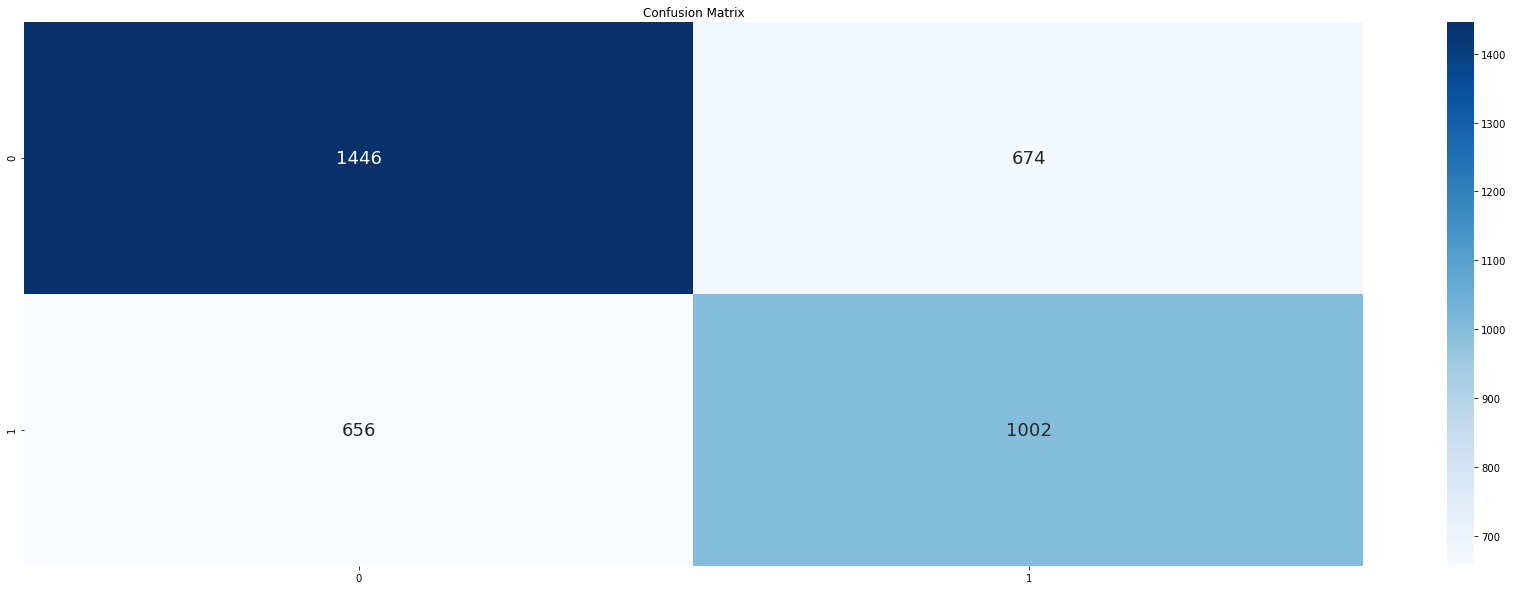

In [48]:
cf_matrix = confusion_matrix(y_test, y_test_hat_mlp)
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(cf_matrix, annot=True, ax=ax, fmt='g', annot_kws={'size': 18}, cmap="Blues")
ax.set_title('Confusion Matrix')

# Testing the model

In [49]:
#Training entire data on Naive Bayes
model_NB= MultinomialNB()
model_NB.fit(X, y)
y_test_hat_NB2 = model_NB.predict(X)
acc_NB2 = accuracy_score(y, y_test_hat_NB2)
print("Multinomial Naive Bayes Accuracy Entire Training Set: ", acc_NB2.round(2))
print('----------------------------------')
print("Classification Report - Multinomial Naive Bayes")
print(classification_report(y, y_test_hat_NB2))

Multinomial Naive Bayes Accuracy Entire Training Set:  0.83
----------------------------------
Classification Report - Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     10474
           1       0.91      0.68      0.78      8412

    accuracy                           0.83     18886
   macro avg       0.85      0.81      0.82     18886
weighted avg       0.84      0.83      0.82     18886



In [50]:
#Trainng entire data on Logistic
model_LG1 = LogisticRegression(max_iter=2500, class_weight='balanced')
model_LG1.fit(X, y)
y_test_hat_LG1 = model_LG1.predict(X)
acc_LG1 = accuracy_score(y, y_test_hat_LG1)

print("Logistic Regression Accuracy Entire Training Set: ", acc_LG1.round(2))
print('----------------------------------')
print("Classification Report - Logistic Regression")
print(classification_report(y, y_test_hat_LG1))

Logistic Regression Accuracy Entire Training Set:  0.83
----------------------------------
Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.82      0.84     10474
           1       0.79      0.85      0.82      8412

    accuracy                           0.83     18886
   macro avg       0.83      0.83      0.83     18886
weighted avg       0.83      0.83      0.83     18886



In [51]:
#importing and cleaning the evaluation set
eval_data = pd.read_csv("movie_story_evaluation_file.csv")
eval_data.head()

,movie_id,story
0,122349,Growing up in the Mission district of San Fran...
1,122351,A soldier returns home from the Iraq war only ...
2,122361,Marco the Monkey works as a beach officer. But...
3,187901,"When an honest cop, Vijay Kumar\'s family is r..."
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr..."


In [52]:
# Merging both movie & movie_evaluation datasets into new set 
evaluation_dataset = pd.merge(eval_data, movies, left_on='movie_id',right_on='movieId',how='inner').drop(['title','movieId'], axis=1)
evaluation_dataset.head()
evaluation_dataset.shape

(3498, 3)

In [53]:
evaluation_dataset = evaluation_dataset[evaluation_dataset.genres != "(no genres listed)"]
evaluation_dataset = evaluation_dataset.dropna()
evaluation_dataset.shape

(3302, 3)

In [54]:
clean_eval=[]
for char in evaluation_dataset['story']:
    char = char.lower()  #Convert to lowercase
    char.rstrip()
    char.lstrip()
    char = re.sub(' s ',' ',char)  #remove extra characters 
    char = re.sub(' +', ' ',char) #remove extra space
    char = re.sub(r'[^\w] ',' ',char)  #remove symbols
    char = re.sub(r'[^\w\s]',' ',char) #remove symbols
    char = re.sub(r'\\x..',' ',char) #remove HTML tags
    char = re.sub("[^a-zA-Z]"," ",char) 
    clean_eval.append(char)

evaluation_dataset['story']=clean_eval

In [55]:
evaluation_dataset["genres"].value_counts()

Drama                                  572
Documentary                            417
Comedy                                 309
Comedy|Drama                           157
Drama|Romance                           95
                                      ... 
Adventure|Drama|Western                  1
Comedy|Documentary|Drama                 1
Animation|Children|Fantasy|Thriller      1
Horror|Mystery|Romance                   1
Action|Comedy|Crime|Horror               1
Name: genres, Length: 388, dtype: int64

In [56]:
#Convert movies with "Drama" genre to binary format
#Add a new column - Drama Genre to identify movies with Drama genre
evaluation_dataset["DramaGenre"] = np.where(evaluation_dataset["genres"].str.contains("Drama"), 1, 0)
evaluation_dataset.head()

,movie_id,story,genres,DramaGenre
0,122349,growing up in the mission district of san fran...,Drama,1
1,122351,a soldier returns home from the iraq war only ...,Horror|Thriller,0
2,122361,marco the monkey works as a beach officer but ...,Animation|Children|Comedy,0
3,187901,when an honest cop vijay kumar s family is ru...,Action|Romance,0
4,187903,kathiresan aka kaththi a criminal escapes from...,Action|Drama|Romance,1


In [57]:
evaluation_dataset = evaluation_dataset.drop('genres', axis=1)
evaluation_dataset.head()

,movie_id,story,DramaGenre
0,122349,growing up in the mission district of san fran...,1
1,122351,a soldier returns home from the iraq war only ...,0
2,122361,marco the monkey works as a beach officer but ...,0
3,187901,when an honest cop vijay kumar s family is ru...,0
4,187903,kathiresan aka kaththi a criminal escapes from...,1


In [58]:
evaluation_dataset.DramaGenre.value_counts()

0    1879
1    1423
Name: DramaGenre, dtype: int64

# Text Analysis on evaluation_dataset

In [59]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)
evaluation_dataset['story'] = evaluation_dataset['story'].apply(lemmatize_words)

text, y = evaluation_dataset.story, evaluation_dataset.DramaGenre

set(y)

{0, 1}

In [60]:
evaluation_dataset['DramaGenre'].value_counts()

0    1879
1    1423
Name: DramaGenre, dtype: int64

In [61]:
vect = CountVectorizer(ngram_range=(1,3),stop_words="english").fit(text) 

# Defining X & y variables from evaluation_dataset
new_X = vect.fit_transform(text)
new_Y = evaluation_dataset.DramaGenre

print("The number of features are: {}".format(len(vect.get_feature_names_out())))

The number of features are: 174401


In [62]:
#Check with Mutinomial Naive Bayes
model_NB_1= MultinomialNB()
model_NB_1.fit(new_X, y)
y_test_hat_NB3 = model_NB_1.predict(new_X)


In [63]:
#accuracy metrics for Naive Bayes
acc_NB3 = accuracy_score(new_Y, y_test_hat_NB3)
print("Multinomial Naive Bayes Accuracy Evaluation Set: ", acc_NB3.round(2))
print('----------------------------------')
print("Classification Report - Multinomial Naive Bayes")
print(classification_report(new_Y, y_test_hat_NB3))

Multinomial Naive Bayes Accuracy Evaluation Set:  1.0
----------------------------------
Classification Report - Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1879
           1       1.00      1.00      1.00      1423

    accuracy                           1.00      3302
   macro avg       1.00      1.00      1.00      3302
weighted avg       1.00      1.00      1.00      3302



In [64]:
#Check with Logistic Regression on evaluation_dataset
model_LG_1= LogisticRegression(max_iter=2500, class_weight='balanced')
model_LG_1.fit(new_X, y)
y_test_hat_LG3 = model_LG_1.predict(new_X)

In [65]:
#accuracy metrics for logistic
acc_LG3 = accuracy_score(new_Y, y_test_hat_LG3)

print("Logistic Regression Accuracy Evaluation Set: ", acc_LG3.round(2))
print('----------------------------------')
print("Classification Report - Logistic Regression")
print(classification_report(new_Y, y_test_hat_LG3))

Logistic Regression Accuracy Evaluation Set:  1.0
----------------------------------
Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1879
           1       1.00      1.00      1.00      1423

    accuracy                           1.00      3302
   macro avg       1.00      1.00      1.00      3302
weighted avg       1.00      1.00      1.00      3302

